In [1]:
from train_gp import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

In [2]:
small_dataset_path = 'data\DGA TC10.xlsx'

343


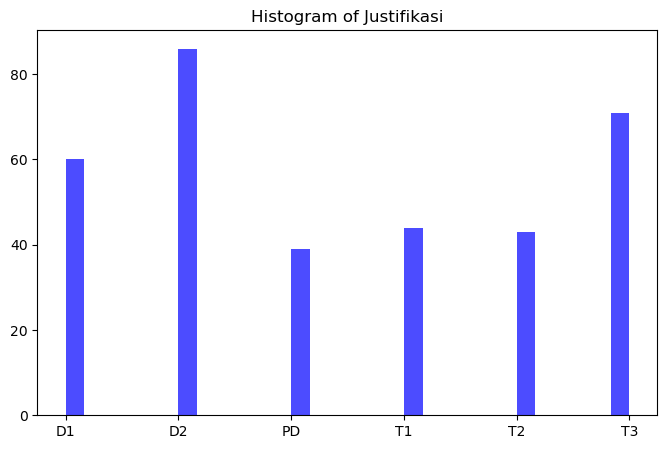

In [3]:
# Read the test data
small_dataset = pd.read_excel(small_dataset_path, sheet_name='Sheet1')
small_dataset = transform_small_dataset(small_dataset)
print(len(small_dataset))

# Plot histogram of Justifikasi column
plt.figure(figsize=(8, 5))
plt.hist(small_dataset['Justifikasi'].astype(str), bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Justifikasi')
plt.show()

# PCA

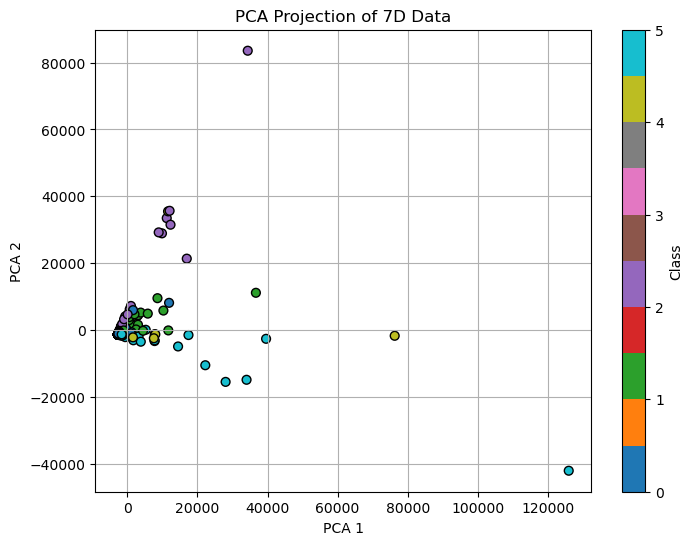

In [4]:
X_pca = small_dataset.iloc[:, :-1].to_numpy()
y_pca = small_dataset["Justifikasi"]
y_pca = y_pca.map(encode_justifikasi).to_numpy()
# Reduce dimensions from 7D to 2D
pca_2D = PCA(n_components=2)
X_reduced_2d = pca_2D.fit_transform(X_pca)

# Plot with class colors
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_reduced_2d[:, 0], X_reduced_2d[:, 1], c=y_pca, cmap='tab10', s=40, edgecolor='k')
plt.title('PCA Projection of 7D Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter, label='Class')
plt.grid(True)
plt.show()


In [5]:
# # Reduce dimensions from 7D to 3D
# pca = PCA(n_components=3)
# X_reduced3D = pca.fit_transform(X)

# fig = plt.figure(1, figsize=(8, 6))
# ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

# # Mapping from numerical value to class name
# label_map = {0: "D1", 1: "D2", 2: "PD", 3: "T1", 4: "T2", 5: "T3"}

# # Plot with class colors and add legend
# for class_value, class_name in label_map.items():
#     idx = y == class_value
#     ax.scatter(
#         X_reduced3D[idx, 0],
#         X_reduced3D[idx, 1],
#         X_reduced3D[idx, 2],
#         label=class_name,
#         s=40,
#     )

# ax.set(
#     title="First three PCA dimensions",
#     xlabel="1st Eigenvector",
#     ylabel="2nd Eigenvector",
#     zlabel="3rd Eigenvector",
# )
# ax.xaxis.set_ticklabels([])
# ax.yaxis.set_ticklabels([])
# ax.zaxis.set_ticklabels([])

# ax.legend(title="Justifikasi")
# plt.show()

# Gaussian Process Classification

## D1 vs R

In [6]:
D1VsR_PCA_data_generator = OneVsRestDataExtraction((X_reduced_2d, small_dataset["Justifikasi"].to_numpy()), "D1", random_state=100)
D1VsR_PCA_reports_name = ["D1vsRPCA_10_5","D1vsRPCA_15_5","D1vsRPCA_20_10","D1vsRPCA_25_10","D1vsRPCA_30_15","D1vsRPCA_35_15"]

In [7]:
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
D1vsR_gpc = GaussianProcessClassifier(kernel=rbf, n_restarts_optimizer=20, max_iter_predict=300, random_state=3)

In [8]:
D1vsR_PCA_reports = train_onevsrest_gpc_with_data_variation(D1vsR_gpc,
                                        D1VsR_PCA_data_generator, 
                                        [10,15,20,25,30,35],
                                        [5,5,10,10,15,15],
                                        D1VsR_PCA_reports_name)


c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\_gpc.py:456: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()


In [9]:
print_report(D1VsR_PCA_reports_name, D1vsR_PCA_reports)

Classifier: D1vsRPCA
----------------------------------------
Training Data Distribution:
  Selected class samples : 10
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 224
  Incorrect predictions on sampled test data : 84
  Percentage of correct prediction : 72.72727272727273 %

Classifier: D1vsRPCA
----------------------------------------
Training Data Distribution:
  Selected class samples : 15
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 258
  Incorrect predictions on sampled test data : 45
  Percentage of correct prediction : 85.14851485148515 %

Classifier: D1vsRPCA
----------------------------------------
Training Data Distribution:
  Selected class samples : 20
  Rest of class samples  : 50
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 218
 

## D2 vs R

In [10]:
D2VsR_PCA_data_generator = OneVsRestDataExtraction((X_reduced_2d, small_dataset["Justifikasi"].to_numpy()), "D2", random_state=120)
D2VsR_PCA_reports_name = ["D2vsRPCA_10_5","D2vsRPCA_15_5","D2vsRPCA_20_10","D2vsRPCA_25_10","D2vsRPCA_30_15","D2vsRPCA_35_15"]

In [11]:
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
D2vsR_gpc = GaussianProcessClassifier(kernel=rbf, n_restarts_optimizer=15, max_iter_predict=300, random_state=10)

In [12]:
D2vsR_PCA_reports = train_onevsrest_gpc_with_data_variation(D2vsR_gpc,
                                        D2VsR_PCA_data_generator, 
                                        [10,15,20,25,30,35],
                                        [5,5,10,10,15,15],
                                        D2VsR_PCA_reports_name)


c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [13]:
print_report(D2VsR_PCA_reports_name, D2vsR_PCA_reports)

Classifier: D2vsRPCA
----------------------------------------
Training Data Distribution:
  Selected class samples : 10
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 232
  Incorrect predictions on sampled test data : 76
  Percentage of correct prediction : 75.32467532467533 %

Classifier: D2vsRPCA
----------------------------------------
Training Data Distribution:
  Selected class samples : 15
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 232
  Incorrect predictions on sampled test data : 71
  Percentage of correct prediction : 76.56765676567657 %

Classifier: D2vsRPCA
----------------------------------------
Training Data Distribution:
  Selected class samples : 20
  Rest of class samples  : 50
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 207
 

## PD vs R

In [14]:
PDVsR_PCA_data_generator = OneVsRestDataExtraction((X_reduced_2d, small_dataset["Justifikasi"].to_numpy()), "PD", random_state=121)
PDVsR_PCA_reports_name = ["PDvsRPCA_10_5","PDvsRPCA_15_5","PDvsRPCA_20_10","PDvsRPCA_25_10","PDvsRPCA_30_15","PDvsRPCA_35_15"]

In [15]:
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
PDvsR_gpc = GaussianProcessClassifier(kernel=rbf, n_restarts_optimizer=15, max_iter_predict=400, random_state=11)

In [16]:
PDvsR_PCA_reports = train_onevsrest_gpc_with_data_variation(PDvsR_gpc,
                                        PDVsR_PCA_data_generator, 
                                        [10,15,20,25,30,35],
                                        [5,5,10,10,15,15],
                                        PDVsR_PCA_reports_name)


c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\_gpc.py:456: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\_gpc.py:477: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATI

In [17]:
print_report(PDVsR_PCA_reports_name, PDvsR_PCA_reports)

Classifier: PDvsRPCA
----------------------------------------
Training Data Distribution:
  Selected class samples : 10
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 277
  Incorrect predictions on sampled test data : 31
  Percentage of correct prediction : 89.93506493506493 %

Classifier: PDvsRPCA
----------------------------------------
Training Data Distribution:
  Selected class samples : 15
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 247
  Incorrect predictions on sampled test data : 56
  Percentage of correct prediction : 81.51815181518151 %

Classifier: PDvsRPCA
----------------------------------------
Training Data Distribution:
  Selected class samples : 20
  Rest of class samples  : 50
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 255
 

## T1 vs R

In [18]:
T1VsR_PCA_data_generator = OneVsRestDataExtraction((X_reduced_2d, small_dataset["Justifikasi"].to_numpy()), "T1", random_state=151)
T1VsR_PCA_reports_name = ["T1vsRPCA_10_5","T1vsRPCA_15_5","T1vsRPCA_20_10","T1vsRPCA_25_10","T1vsRPCA_30_15","T1vsRPCA_35_15"]

In [19]:
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
T1vsR_gpc = GaussianProcessClassifier(kernel=rbf, n_restarts_optimizer=15, max_iter_predict=300, random_state=29)

In [20]:
T1vsR_PCA_reports = train_onevsrest_gpc_with_data_variation(T1vsR_gpc,
                                        T1VsR_PCA_data_generator, 
                                        [10,15,20,25,30,35],
                                        [5,5,10,10,15,15],
                                        T1VsR_PCA_reports_name)


c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [21]:
print_report(T1VsR_PCA_reports_name, T1vsR_PCA_reports)

Classifier: T1vsRPCA
----------------------------------------
Training Data Distribution:
  Selected class samples : 10
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 274
  Incorrect predictions on sampled test data : 34
  Percentage of correct prediction : 88.96103896103897 %

Classifier: T1vsRPCA
----------------------------------------
Training Data Distribution:
  Selected class samples : 15
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 274
  Incorrect predictions on sampled test data : 29
  Percentage of correct prediction : 90.42904290429043 %

Classifier: T1vsRPCA
----------------------------------------
Training Data Distribution:
  Selected class samples : 20
  Rest of class samples  : 50
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 249
 

## T2 vs R

In [22]:
T2VsR_PCA_data_generator = OneVsRestDataExtraction((X_reduced_2d, small_dataset["Justifikasi"].to_numpy()), "T2", random_state=171)
T2VsR_PCA_reports_name = ["T2vsRPCA_10_5","T2vsRPCA_15_5","T2vsRPCA_20_10","T2vsRPCA_25_10","T2vsRPCA_30_15","T2vsRPCA_35_15"]

In [23]:
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
T2vsR_gpc = GaussianProcessClassifier(kernel=rbf, n_restarts_optimizer=15, max_iter_predict=300, random_state=39)

In [24]:
T2vsR_PCA_reports = train_onevsrest_gpc_with_data_variation(T2vsR_gpc,
                                        T2VsR_PCA_data_generator, 
                                        [10,15,20,25,30,35],
                                        [5,5,10,10,15,15],
                                        T2VsR_PCA_reports_name)


c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [25]:
print_report(T2VsR_PCA_reports_name, T2vsR_PCA_reports)

Classifier: T2vsRPCA
----------------------------------------
Training Data Distribution:
  Selected class samples : 10
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 274
  Incorrect predictions on sampled test data : 34
  Percentage of correct prediction : 88.96103896103897 %

Classifier: T2vsRPCA
----------------------------------------
Training Data Distribution:
  Selected class samples : 15
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 258
  Incorrect predictions on sampled test data : 45
  Percentage of correct prediction : 85.14851485148515 %

Classifier: T2vsRPCA
----------------------------------------
Training Data Distribution:
  Selected class samples : 20
  Rest of class samples  : 50
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 229
 

## T3 vs R

In [26]:
T3VsR_PCA_data_generator = OneVsRestDataExtraction((X_reduced_2d, small_dataset["Justifikasi"].to_numpy()), "T3", random_state=173)
T3VsR_PCA_reports_name = ["T3vsRPCA_10_5","T3vsRPCA_15_5","T3vsRPCA_20_10","T3vsRPCA_25_10","T3vsRPCA_30_15","T3vsRPCA_35_15"]

In [27]:
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
T3vsR_gpc = GaussianProcessClassifier(kernel=rbf, n_restarts_optimizer=15, max_iter_predict=300, random_state=73)

In [28]:
T3vsR_PCA_reports = train_onevsrest_gpc_with_data_variation(T3vsR_gpc,
                                        T3VsR_PCA_data_generator, 
                                        [10,15,20,25,30,35],
                                        [5,5,10,10,15,15],
                                        T3VsR_PCA_reports_name)


In [29]:
print_report(T3VsR_PCA_reports_name, T3vsR_PCA_reports)

Classifier: T3vsRPCA
----------------------------------------
Training Data Distribution:
  Selected class samples : 10
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 248
  Incorrect predictions on sampled test data : 60
  Percentage of correct prediction : 80.51948051948052 %

Classifier: T3vsRPCA
----------------------------------------
Training Data Distribution:
  Selected class samples : 15
  Rest of class samples  : 25
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 231
  Incorrect predictions on sampled test data : 72
  Percentage of correct prediction : 76.23762376237624 %

Classifier: T3vsRPCA
----------------------------------------
Training Data Distribution:
  Selected class samples : 20
  Rest of class samples  : 50
----------------------------------------
Training Accuracy:
  Correct predictions on sampled test data   : 231
 

# Test all 1vsR Classifier

In [30]:
D1vsR_PCA_models_name =  ["D1vsRPCA_10_5","D1vsRPCA_20_10","D1vsRPCA_30_15"]
D1vsR_PCA_trained_model = train_onevsrest_gpc_with_data_variation(D1vsR_gpc,
                                        D1VsR_PCA_data_generator, 
                                        [10,20,30],
                                        [5,10,15],
                                        D1vsR_PCA_models_name,
                                        copy_gpc_model=True)

c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [31]:
D2vsR_PCA_models_name =  ["D2vsRPCA_10_5","D2vsRPCA_20_10","D2vsRPCA_30_15"]
D2vsR_PCA_trained_model = train_onevsrest_gpc_with_data_variation(D2vsR_gpc,
                                        D2VsR_PCA_data_generator, 
                                        [10,20,30],
                                        [5,10,15],
                                        D2vsR_PCA_models_name,
                                        copy_gpc_model=True)

In [32]:
PDvsR_PCA_models_name =  ["PDvsRPCA_10_5","PDvsRPCA_20_10","PDvsRPCA_30_15"]
PDvsR_PCA_trained_model = train_onevsrest_gpc_with_data_variation(PDvsR_gpc,
                                        PDVsR_PCA_data_generator, 
                                        [10,20,30],
                                        [5,10,15],
                                        PDvsR_PCA_models_name,
                                        copy_gpc_model=True)

c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\_gpc.py:477: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
c:\Users\Rafi\miniconda3\envs\MLEnv\lib\site-packages\sklearn\gaussian_process\_gpc.py:456: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()


In [33]:
T1vsR_PCA_models_name =  ["T1vsRPCA_10_5","T1vsRPCA_20_10","T1vsRPCA_30_15"]
T1vsR_PCA_trained_model = train_onevsrest_gpc_with_data_variation(T1vsR_gpc,
                                        T1VsR_PCA_data_generator, 
                                        [10,20,30],
                                        [5,10,15],
                                        T1vsR_PCA_models_name,
                                        copy_gpc_model=True)


In [34]:
T2vsR_PCA_models_name =  ["T2vsRPCA_10_5","T2vsRPCA_20_10","T2vsRPCA_30_15"]
T2vsR_PCA_trained_model = train_onevsrest_gpc_with_data_variation(T2vsR_gpc,
                                        T2VsR_PCA_data_generator, 
                                        [10,20,30],
                                        [5,10,15],
                                        T2vsR_PCA_models_name,
                                        copy_gpc_model=True)


In [35]:
T3vsR_PCA_models_name =  ["T3vsRPCA_10_5","T3vsRPCA_20_10","T3vsRPCA_30_15"]
T3vsR_PCA_trained_model = train_onevsrest_gpc_with_data_variation(T3vsR_gpc,
                                        T3VsR_PCA_data_generator, 
                                        [10,20,30],
                                        [5,10,15],
                                        T3vsR_PCA_models_name,
                                        copy_gpc_model=True)

In [39]:
all_classifiers = {
    "D1": D1vsR_PCA_trained_model['D1vsRPCA_10_5'].gpc_model, 
    "D2": D2vsR_PCA_trained_model['D2vsRPCA_10_5'].gpc_model, 
    "PD": PDvsR_PCA_trained_model['PDvsRPCA_10_5'].gpc_model, 
    "T1": T1vsR_PCA_trained_model['T1vsRPCA_10_5'].gpc_model, 
    "T2": T2vsR_PCA_trained_model['T2vsRPCA_10_5'].gpc_model, 
    "T3": T3vsR_PCA_trained_model['T3vsRPCA_10_5'].gpc_model
    }

# Precompute probabilities for all classifiers (shape: n_class, n_samples)
proba_matrix = np.vstack([
    clf.predict_proba(X_reduced_2d)[:, -1] for clf in all_classifiers.values() # type: ignore
])

# Get predicted class indices by taking argmax along the classifier axis
prediction_indices = np.argmax(proba_matrix, axis=0)

# Map indices back to class names and then encode
class_names = list(all_classifiers.keys())
prediction_labels = [class_names[idx] for idx in prediction_indices]
prediction = np.array(list(map(encode_justifikasi, prediction_labels)))



In [40]:
number_of_correct_predictions = np.sum(prediction == y_pca)
percentage_of_correct_predictions = number_of_correct_predictions/len(y_pca)*100
print("Number of correct prediction =",number_of_correct_predictions)
print("Percentage of correct prediction =", percentage_of_correct_predictions)

Number of correct prediction = 131
Percentage of correct prediction = 38.19241982507289
